In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Stagiaire\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Import all the data from the comparison of methods
percentage_list = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5]
dataframes = {}
for nombre in percentage_list:
    filename = f"df_comparaison_{nombre}.csv"  
    full_path = f"Datasets\Comparaison_visu_dublin\{filename}"  # Chemin complet
    dataframes[f"df_{nombre}"] = pd.read_csv(full_path) 

In [79]:
embedding, cos, lev = {}, {}, {}
for df in dataframes:
    for methode in dataframes[df].columns:
        if methode not in embedding:
            embedding[methode] = []
            cos[methode] = []
            lev[methode] = []
        embedding[methode].append(dataframes[df][methode][0])
        cos[methode].append(dataframes[df][methode][2])
        lev[methode].append(dataframes[df][methode][1])

In [80]:
methodes = [embedding, cos, lev]

In [136]:
def plot_compare_score(x, methodes):
    list_methode = ["Embedding", "Cos²", "Levenshtein"]
    line_styles = ['-', "--", "-."]
    plt.figure(figsize=(10, 6))
    for i, methode in enumerate(methodes):
        methode_name = list_methode[i]
        line_style = line_styles[i]
        plt.plot(x, methode['Silouhette_score'], label=f'Silhouette_Score_{methode_name}', marker='o', linestyle = line_style)
        plt.plot(x, methode['Davies_bouldin'], label=f'Davies-Bouldin_Index_{methode_name}', marker='s', linestyle = line_style)
    
    plt.title(f'Evolution du score en fonction du pourcentage de donnée utilisée')
    plt.xlabel('Number of attempts')
    plt.ylabel('Score')
    plt.legend(loc='upper left', fontsize=8)
    plt.grid()
    plt.savefig(f"clis_silh_davies")
    plt.show()

        
    plt.figure(figsize=(10, 6))
    for i, methode in enumerate(methodes):
        methode_name = list_methode[i]
        line_style = line_styles[i]
        plt.plot(percentage_list, methode['Calisnki'], label=f'Calinski-Harabasz_Score_{methode_name}', marker='^', linestyle = line_style)
    
    # plt.title(f'Evolution du score en fonction du pourcentage de donnée utilisée {(methode_used)}')
    plt.title(f'Evolution du score en fonction du pourcentage de donnée utilisée')
    plt.xlabel('Number of attempts')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.savefig(f"clus_calinski")
    plt.show()

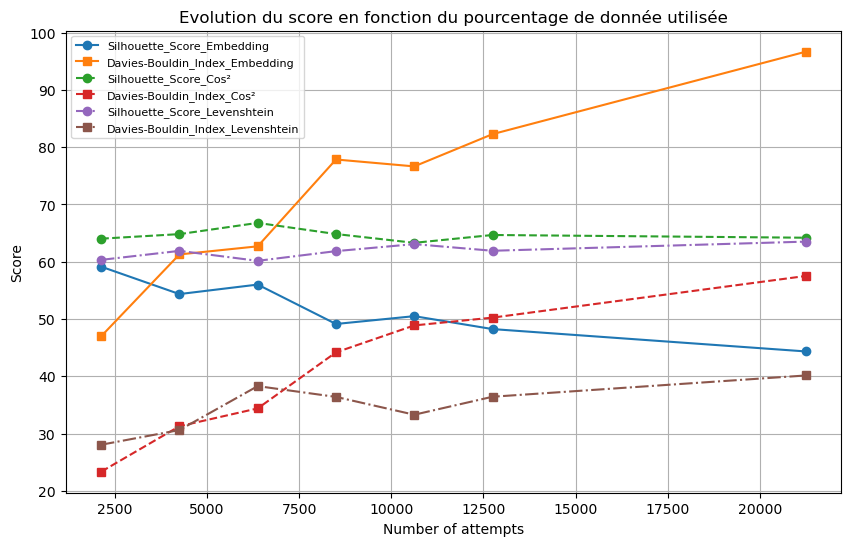

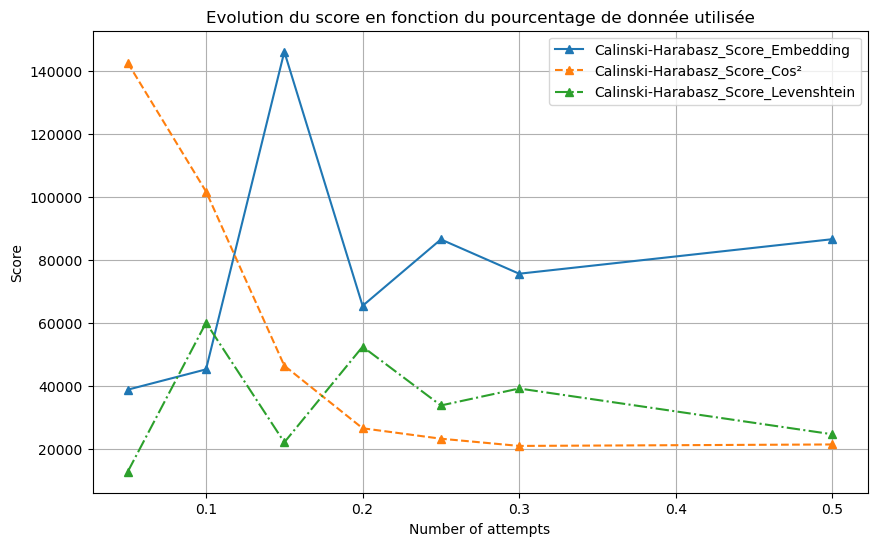

In [137]:
plot_compare_score(data_kept, methodes)